In [ ]:
pip install pandas

In [14]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [17]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
import sklearn.metrics as metrics

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.shape

(284807, 31)

In [7]:
data.size

8829017

In [8]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#checking the no. of missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
#distribution of legit transctions & fraudulant transcations
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
# this data is highly unbalanced
# 0 ---> Normal Transaction
# 1 ---> fraudulent transaction

In [13]:
#separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [14]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [15]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0, 0.5, 'Frequency')

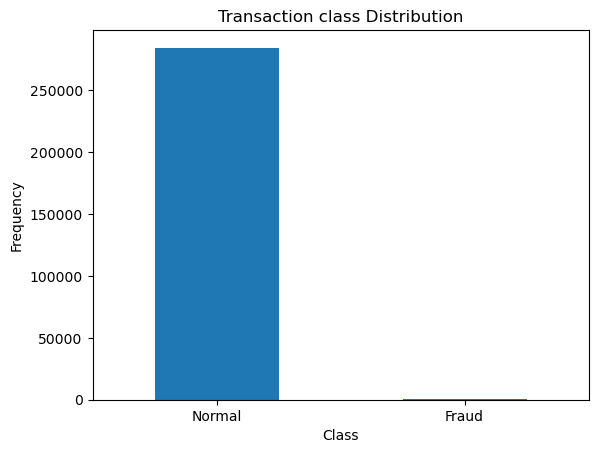

In [18]:
#visualization
count_classes = pd.Series(data['Class']).value_counts(sort =True)
count_classes.plot(kind = 'bar' ,rot =0)
plt.title("Transaction class Distribution")
labels = ['Normal' ,'Fraud']
plt.xticks(range(2),labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


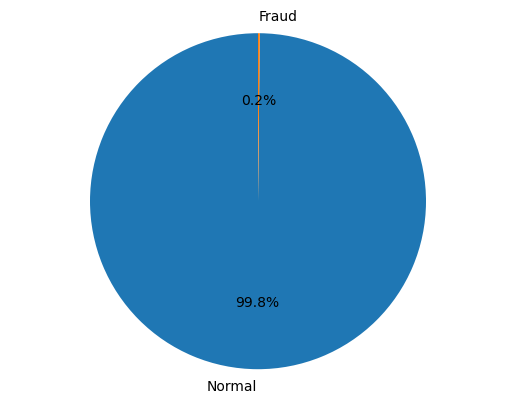

In [21]:
labels = ['Normal', 'Fraud']
sizes = [len(legit), len(fraud)]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
plt.show()

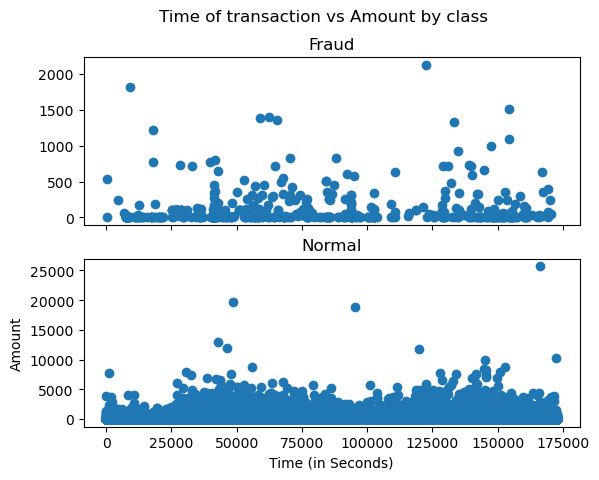

In [27]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [50]:
#campare the values for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [51]:
#under-sampling
#Build a sample dataset containg similar distribution of normal transction and fraudlent Transactions

#Number of fraudulent  transactions = 492

legit_sample =legit.sample(n=492)

In [52]:
#concatenting two dataframes
new_data = pd.concat([legit_sample, fraud], axis=0)

In [53]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101013,67700.0,0.871636,-0.312534,-0.174950,0.698637,-0.363091,-1.169237,0.731305,-0.399664,-0.269521,...,-0.250326,-1.223540,-0.045095,0.406936,0.220473,0.113968,-0.101827,0.047519,219.90,0
148055,89326.0,1.735315,-0.872228,-0.528390,0.401602,-0.903131,-0.657221,-0.395009,-0.133057,1.086442,...,0.256166,0.542773,0.045464,-0.052926,-0.389971,0.643473,-0.064502,-0.024361,155.19,0
47620,43281.0,1.202344,-0.226477,0.660022,-0.070532,-0.769414,-0.380455,-0.481225,0.105136,0.313367,...,-0.123225,-0.477233,0.079176,0.026527,-0.003419,0.824722,-0.071862,0.003610,23.85,0
55207,46835.0,1.116144,-0.554905,0.725504,0.109831,-0.777965,0.140344,-0.489934,0.024403,1.091308,...,-0.227979,-0.520454,-0.107342,-0.347917,0.254753,0.982619,-0.042874,0.022056,88.72,0
185058,126504.0,1.913846,-0.478443,-0.176339,0.431492,-0.792866,-0.263035,-0.720649,0.109872,1.223135,...,0.256518,0.958440,0.124223,0.039600,-0.158759,-0.232481,0.040039,-0.046153,11.50,0


In [54]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [55]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [56]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,89709.981707,0.033187,0.082213,0.082501,-0.002448,-0.107381,0.029015,-0.155879,-0.005640,0.077810,...,0.003671,0.013928,-0.016740,-0.021374,-0.00994,-0.009797,0.024560,0.020345,-0.000195,74.409106
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [57]:
#splitting the data into features & Targets
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [58]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
101013,67700.0,0.871636,-0.312534,-0.174950,0.698637,-0.363091,-1.169237,0.731305,-0.399664,-0.269521,...,0.355587,-0.250326,-1.223540,-0.045095,0.406936,0.220473,0.113968,-0.101827,0.047519,219.90
148055,89326.0,1.735315,-0.872228,-0.528390,0.401602,-0.903131,-0.657221,-0.395009,-0.133057,1.086442,...,0.114015,0.256166,0.542773,0.045464,-0.052926,-0.389971,0.643473,-0.064502,-0.024361,155.19
47620,43281.0,1.202344,-0.226477,0.660022,-0.070532,-0.769414,-0.380455,-0.481225,0.105136,0.313367,...,-0.049716,-0.123225,-0.477233,0.079176,0.026527,-0.003419,0.824722,-0.071862,0.003610,23.85
55207,46835.0,1.116144,-0.554905,0.725504,0.109831,-0.777965,0.140344,-0.489934,0.024403,1.091308,...,0.181029,-0.227979,-0.520454,-0.107342,-0.347917,0.254753,0.982619,-0.042874,0.022056,88.72
185058,126504.0,1.913846,-0.478443,-0.176339,0.431492,-0.792866,-0.263035,-0.720649,0.109872,1.223135,...,-0.225442,0.256518,0.958440,0.124223,0.039600,-0.158759,-0.232481,0.040039,-0.046153,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [59]:
Y

101013    0
148055    0
47620     0
55207     0
185058    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [60]:
#split the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state =2)

In [92]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [93]:
#model training
#logistic regression
model = LogisticRegression()

In [94]:
 #training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

In [95]:
#model Evaluation
#Accuracy Score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [96]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.9390088945362135


In [97]:
#Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [98]:
print('logistic regression Accuracy:',test_data_accuracy)

logistic regression Accuracy: 0.9238578680203046


Confusion Matrix - Logistic Regression
[[87  8]
 [ 7 95]]


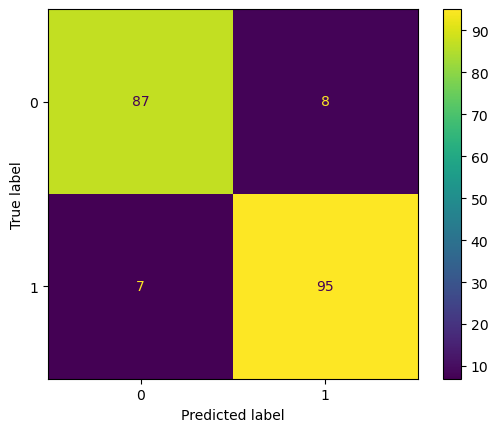

In [116]:
confusion_matrix_lr = confusion_matrix(Y_test, X_test_prediction.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr)
disp.plot()
plt.show()

In [117]:
#Evaluation of Logistic regression 
print("Evaluation of Logistic regression Model")
print()
accuracy_lr = accuracy_score(Y_test, X_test_prediction.round())
precision_lr = precision_score(Y_test, X_test_prediction.round())
recall_lr = recall_score(Y_test, X_test_prediction.round())
f1score_lr = f1_score(Y_test, X_test_prediction.round())
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1_score: {f1score_lr}")

Evaluation of Logistic regression Model

Accuracy: 0.9238578680203046
Precision: 0.9223300970873787
Recall: 0.9313725490196079
F1_score: 0.9268292682926829


In [65]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [75]:
pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(pred_rf, Y_test)
print("Random forest Accuracy",rf_accuracy)

Random forest Accuracy 0.9441624365482234


Confusion Matrix - Random Forest
[[92  3]
 [ 8 94]]


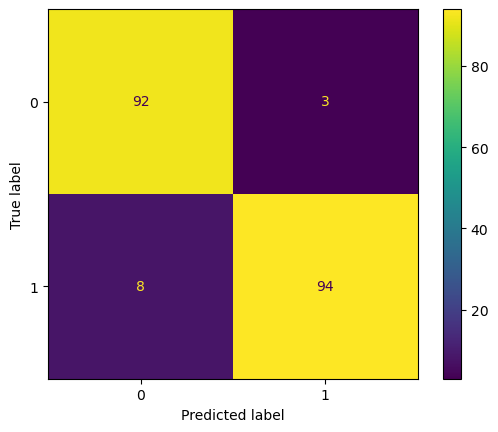

In [81]:
confusion_matrix_rf = confusion_matrix(Y_test, pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.show()

In [114]:
print("Evaluation of Random Forest Model")
print()
accuracy_rf = accuracy_score(Y_test, pred_rf.round())
precision_rf = precision_score(Y_test, pred_rf.round())
recall_rf = recall_score(Y_test, pred_rf.round())
f1score_rf = f1_score(Y_test, pred_rf.round())
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1_score: {f1score_rf}")

Evaluation of Random Forest Model

Accuracy: 0.9441624365482234
Precision: 0.9690721649484536
Recall: 0.9215686274509803
F1_score: 0.9447236180904522


In [118]:
print("Accuracy of logistic regression :",accuracy_lr)
print("Accuracy of Random Forest :",accuracy_rf)

Accuracy of logistic regression : 0.9238578680203046
Accuracy of Random Forest : 0.9441624365482234
